In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Generator sztucznych danych

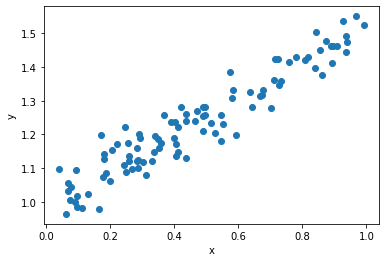

In [4]:
def generator(rozklad_x, model, rozklad_z, typ_z):
  
  # rozklad_x musi w pełni określać macierz X,
  # model musi mieć określone wartości parametrów, za wejście będzie wstawiana X
  # rozkład_z musi w pełni określać macierz Z
  # typ_z może być 'addytywne' lub 'multiplikatywne'
  
  X = rozklad_x()
  Y_pred = model(X)
  #print(X.shape)
  if typ_z == 'addytywne':
    Y = Y_pred + rozklad_z()
  elif typ_z == 'multiplikatywne':
    Y = Y_pred * rozklad_z()

  return X, Y

def model(parametry, x):
  a, b = parametry
  return a*x + b

N=100
X, Y = generator(lambda: np.random.uniform(low=0,high=1, size=N), 
                 lambda x: model(parametry=[0.5,1], x=x),
                 lambda: np.random.normal(loc=0,scale=0.05, size=N),
                 typ_z='addytywne')

plt.scatter(X,Y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

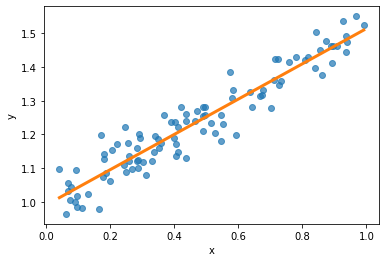

In [5]:
from sklearn.linear_model import LinearRegression

model_lin = LinearRegression()

model_lin.fit(X.reshape(-1,1), Y)

X_test = np.linspace(start=X.min(), stop=X.max(), num=300)
Y_pred = model_lin.predict(X_test.reshape(-1,1))

plt.scatter(X,Y, alpha=0.7)
plt.plot(X_test, Y_pred, color='tab:orange', linewidth=3)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [6]:
print(f'Parametry modelu liniowego: a = {np.round(model_lin.coef_,5)}, b = {np.round(model_lin.intercept_,5)}')

Parametry modelu liniowego: a = [0.52231], b = 0.99106


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

from sklearn.metrics import mean_squared_error

mean_squared_error(Y, model_lin.predict(X.reshape(-1,1)))

0.002109146159840537